# Attendence across marking periods

We'll explore how different student factors relate to attendence.  Specific questions:
- Do absences and/or tardies vary across marking periods?
- Are there particular "at risk" student populations?
- Are the same students at risk for the different types of attendance issues (unexcused absences, excused absences, and tardies)?

In [209]:
#import the relevant libraries

import pandas as pd
import numpy as np
import hypertools as hyp
import seaborn as sns
%matplotlib inline

In [210]:
#load in the data

fname = 'At Risk Students For Dartmouth.xlsx'
sheet1 = 'Year 16-17'
sheet2 = 'Year 17-18 9.25.17'
columns = ('id', 'grade', 'age', 'school', 'sex', 'homeless', 'disadvantaged', 'specialneeds',
           'excused1', 'unexcused1', 'tardy1',
           'excused2', 'unexcused2', 'tardy2',
           'excused3', 'unexcused3', 'tardy3',
           'excused4', 'unexcused4', 'tardy4')
y1_data = pd.read_excel(fname, sheetname=sheet1, skiprows=[0], names=columns)
y2_data = pd.read_excel(fname, sheetname=sheet2, skiprows=[0], names=columns)

#use student IDs as the index
y1_data.set_index('id', inplace=True)
y2_data.set_index('id', inplace=True)

In [211]:
#do some data cleaning

#in "disadvantaged" column, replace "YES" with 1 and NaN with 0
y1_data['disadvantaged'] = y1_data['disadvantaged'].map({np.nan: 0, 'YES': 1})
y2_data['disadvantaged'] = y2_data['disadvantaged'].map({np.nan: 0, 'YES': 1})

#in "specialneeds" column, 
y1_data['specialneeds'] = y1_data['specialneeds'].map({np.nan: 0, 504: '504', 'IEP': 'IEP'})
y2_data['specialneeds'] = y2_data['specialneeds'].map({np.nan: 0, 504: '504', 'IEP': 'IEP'})

#replace '---' with 0 (Fourth marking period columns)
y1_data.replace('---', 0, inplace=True)
y2_data.replace('---', 0, inplace=True)

#replace 'K' with 0 and all other non-number grades with -1
y1_data['grade']= y1_data['grade'].map({'K': 0, 'PD': -1, 'PA': -1, 'PP': -1, 'AW': -1, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8, 9:9, 10:10, 11:11, 12:12})
y2_data['grade']= y2_data['grade'].map({'K': 0, 'PD': -1, 'PA': -1, 'PP': -1, 'AW': -1, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8, 9:9, 10:10, 11:11, 12:12})

Let's look at the cleaned data...

We're going to focus on Year 1 data (we only have a partial dataset for Y2)

In [214]:
y1_data.head()

,grade,age,school,sex,homeless,disadvantaged,specialneeds,excused1,unexcused1,tardy1,excused2,unexcused2,tardy2,excused3,unexcused3,tardy3,excused4,unexcused4,tardy4
id,,,,,,,,,,,,,,,,,,,
300053,10,16,Hartford High School/HACTC,F,N,1,0,22,0,0,0,0,0,0,0,1,2,2,0
300339,12,18,Hartford High School/HACTC,F,N,0,0,4,2,4,13,9,6,27,15,5,36,15,7
300340,11,17,Hartford High School/HACTC,M,N,0,0,1,0,0,5,1,1,3,0,5,24,0,1
300344,9,15,Hartford High School/HACTC,M,N,0,0,0,0,0,15,0,0,0,1,0,3,0,0
300345,8,15,Hartford Memorial Middle School,M,N,0,504,0,0,0,3,0,1,4,0,1,5,0,3


# HyperTools plot of the dataset

We'll define an "attendance score" at the total number of absences and tardies across all marking periods.  Then we'll color students according to their attendance score. 

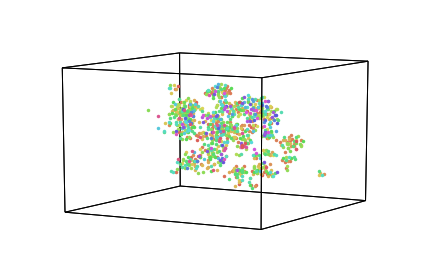

In [216]:
features = ['grade', 'age', 'homeless', 'disadvantaged', 'specialneeds']
attendance_factors = ['excused1', 'excused2', 'excused3', 'excused4', 'unexcused1', 'unexcused2', 'unexcused3', 'unexcused4', 'tardy1', 'tardy2', 'tardy3', 'tardy4']
attendance_score = y1_data[attendance_factors].sum(axis=1)

hyp.plot(y1_data[features], '.', group=attendance_score, model='TSNE');

There appear to be some "clumps" of students that have similar demographics, but the attendance scores do not map onto them well.  Let's explore further, starting with "excused" absences.

In [217]:
#create a dataframe just for the excused absences
y1_excused = y1_data[['excused1', 'excused2', 'excused3', 'excused4']]
y1_excused.head()

,excused1,excused2,excused3,excused4
id,,,,
300053,22,0,0,2
300339,4,13,27,36
300340,1,5,3,24
300344,0,15,0,3
300345,0,3,4,5


# Does attendance vary across marking periods?

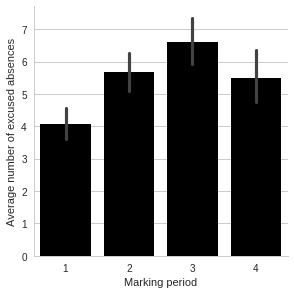

In [218]:
h = sns.factorplot(data=y1_excused, kind='bar', color='k')
h.set_xlabels('Marking period')
h.set_xticklabels([1, 2, 3, 4])
h.set_ylabels('Average number of excused absences')

Let's repeat the above analysis for other attendance factors...

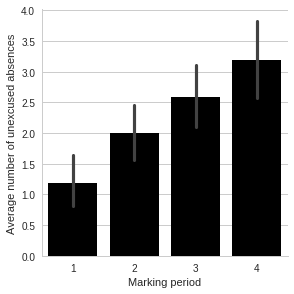

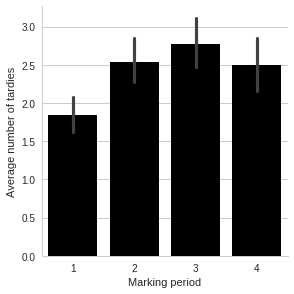

In [219]:
statistics = ['unexcused', 'tardy']
names = ['unexcused absences', 'tardies']
marking_periods = [1, 2, 3, 4]
for x in np.arange(len(statistics)):
    columns = list(map(lambda j: statistics[x] + str(j), marking_periods))
    df = y1_data[columns]
    h = sns.factorplot(data=df, kind='bar', color='k')
    h.set_xlabels('Marking period')
    h.set_xticklabels([1, 2, 3, 4])
    h.set_ylabels('Average number of ' + names[x])
    sns.plt.show()

# Summary 1: There are clear differences in attendance across marking periods.

## Key (tentative findings):
1. "Soft" attendance issues (excused absences and tardies) peak in the 3rd marking period (March -- June).
2. "Hard" attendance issues (unexcused absences) rise throughout the year (dropout?)

# Fishing expedition

Let's explore how every student demographic factor is related to the three types of attendance issue.  We'll define a function for relating a specified-statistic to a specific list of features.  Then we'll run the function for each type of attendance issue.

In [240]:
#which factors are related to total unexcused absenses?
def summarize(data, stat, marking_periods, feature_list):
    columns = list(map(lambda j: stat + str(j), marking_periods))
    df = data[columns].sum(axis=1)
    
    features = data[feature_list]
    
    #see if there are any patterns in student demographics that predict the given statistic
    hyp.plot(features, '.', group=df, model='Isomap');
    
    #loop through all features and make a bar plot relating the given stat to the given feature
    summary = features.copy()
    summary[stat] = df

    for f in features.columns:
        sns.factorplot(data=summary, y=stat, x=f, kind='bar')
        sns.plt.show()

In [241]:
#Define which marking periods and features to include in the analysis
marking_periods = [1, 2, 3, 4]
features = ['grade', 'age', 'school', 'homeless', 'disadvantaged', 'specialneeds']

## Excused absences

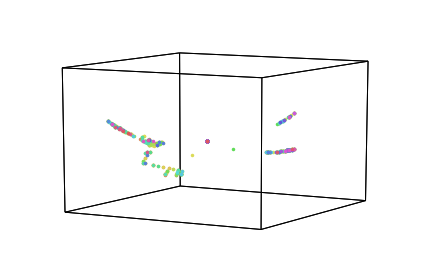

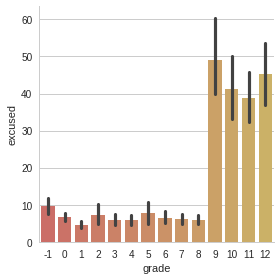

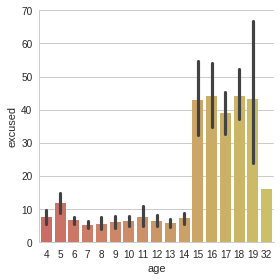

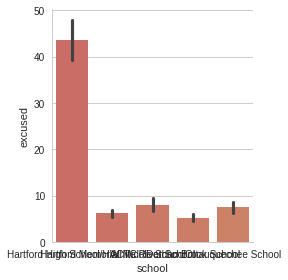

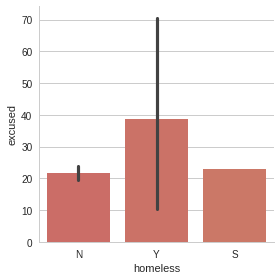

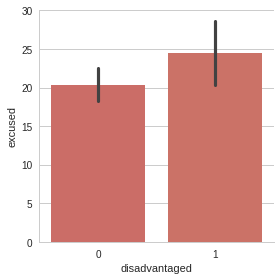

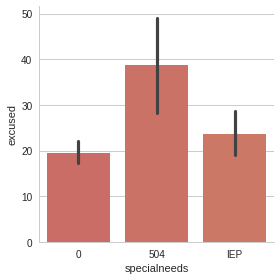

In [242]:
summarize(y1_data, 'excused', marking_periods, features)

## Tardies

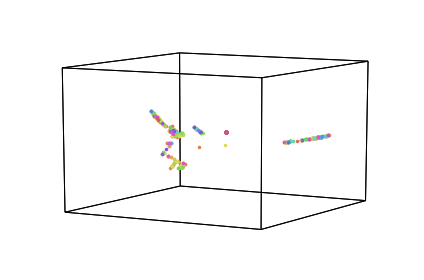

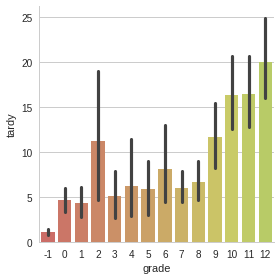

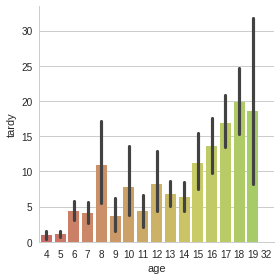

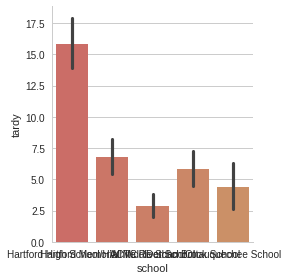

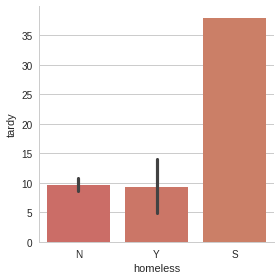

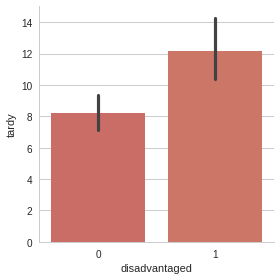

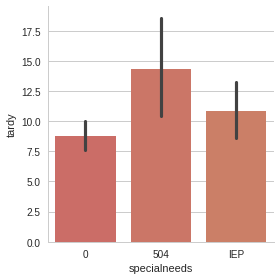

In [243]:
summarize(y1_data, 'tardy', marking_periods, features)

## Unexcused absences

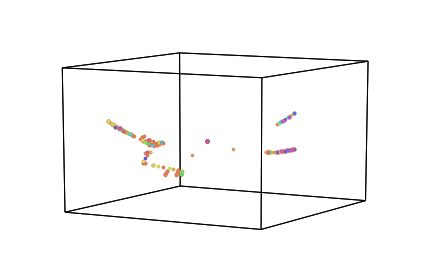

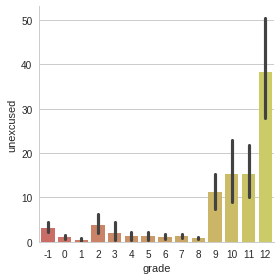

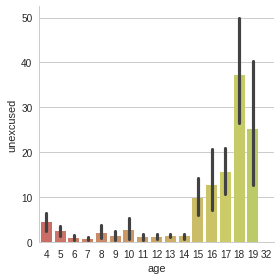

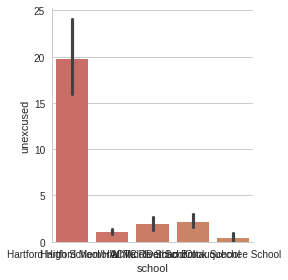

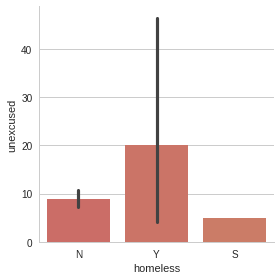

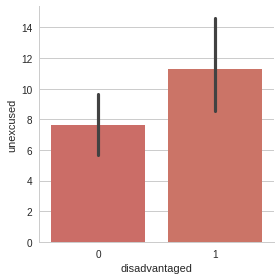

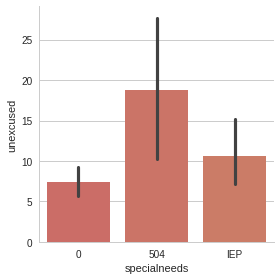

In [244]:
summarize(y1_data, 'unexcused', marking_periods, features)

# Summary 2: different students are "at risk" for different types of attendance issues

## Grade and age

- High school students and students aged 15+ are most at risk for attendence issues in general
- High school seniors are even more at risk for unexcused absences specifically
- 18 year olds are more at risk for unexcused absences than 19 year olds


## School

- Following the grade/age findings, High School students are more at risk for all types of attendance issues

## Homeless
- "Y" homeless students are most at risk for excused and unexcused absenses
- "S" homeless students are most at risk for tardies


## Disadvantaged

- Disadvantaged students are more at risk for all attendance issues
- The effect is weakest for excused absences



## Special needs

- Special needs students (IEP or 504) have more attendance issues overall
- 504 students have more attendance issues than IEP students
